## 1. Create Hexagon Grid (created points in the network in terms of Polygons)

In [1]:
#Import necessary modules
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
import geopandas as gpd
#import pycrs
from hexgrid import calculate_polygons #import from hexgrid.py
import matplotlib.pyplot as plt

In [2]:
# Create the points representing left-low point and right-top point(bounding box) (in WGS84)
start_lon = 118.5243
start_lat = 31.8920
end_lon = 119.0698
end_lat = 32.2030
multi = MultiPoint([Point(start_lon, start_lat),Point(end_lon, end_lat)])
points = gpd.GeoDataFrame(multi, geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry']) #epsg:4326 --> WGS84
print(points)

                  geometry
0  POINT (118.5243 31.892)
1  POINT (119.0698 32.203)


projected points to UTM from WGS84.

In [3]:
points_me = points.copy()
points_me = points_me.to_crs(epsg=32650) #epsg:32650 --> UTM zone 50N which is the UTM zone for Nanjing
points_me

,geometry
0,POINT (644154.3631649486 3529478.034613914)
1,POINT (695090.1749114722 3564815.47933602)


Calculate distance of these two points with metric unit. compare to distance measured by hands on google map. Check if the projection makes sense.

In [4]:
points_me.loc[0,'geometry'].distance(points_me.loc[1,'geometry']) 

61993.48286525908

In [5]:
points_me.loc[0,'geometry'].y

3529478.0346139143

In [6]:
# import calculate_polygons from hexgrid.py
from hexgrid import calculate_polygons

In [8]:
polygon_list = calculate_polygons(points_me.loc[0,'geometry'].x, points_me.loc[0,'geometry'].y, points_me.loc[1,'geometry'].x, points_me.loc[1,'geometry'].y, 125) #radius=125m

In [9]:
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
hexgon_grid = gpd.GeoDataFrame( [Polygon(each_one) for each_one in polygon_list], geometry='geometry', crs={'init': 'epsg:32650'}, columns=['geometry'])

In [10]:
import matplotlib.pyplot as plt
type(hexgon_grid.loc[0,'geometry'])

shapely.geometry.polygon.Polygon

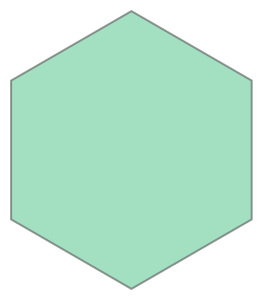

In [11]:
hexgon_grid.loc[0,'geometry']

In [12]:
type(hexgon_grid.loc[0:1000,'geometry'])

geopandas.geoseries.GeoSeries

In [13]:
hexgon_grid.head()

,geometry
0,"POLYGON ((643904.3631649486 3529261.528262968,..."
1,"POLYGON ((644154.3631649486 3529261.528262968,..."
2,"POLYGON ((644404.3631649486 3529261.528262968,..."
3,"POLYGON ((644654.3631649486 3529261.528262968,..."
4,"POLYGON ((644904.3631649486 3529261.528262968,..."


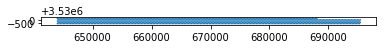

In [14]:
hexgon_grid.loc[0:1000,'geometry'].plot()

In [15]:
hexgon_grid.size # how many points have been created?

34196

In [16]:
len(hexgon_grid) # couble check the number of points created.

34196

In [17]:
# convert crs to wgs84 only in geopandas >= 0.5.0
zone = hexgon_grid.to_crs(epsg=4326)

In [18]:
# zone['start_point_id'] = zone.index # .shp file doesn's support str longer than 9, it will be 'start_poin'
# zone['end_point_id'] = zone.index
zone['start_id'] = zone.index
zone['end_id'] = zone.index
zone.head()

,geometry,start_id,end_id
0,"POLYGON ((118.521625158895 31.8900790484462, 1...",0,0
1,"POLYGON ((118.5242678257038 31.89004738004776,...",1,1
2,"POLYGON ((118.5269104883526 31.8900156567382, ...",2,2
3,"POLYGON ((118.5295531468342 31.88998387851783,...",3,3
4,"POLYGON ((118.5321958011414 31.88995204538694,...",4,4


In [19]:
zone.to_file('shp_file/zone_125m_wgs84.shp')